In [1]:
import numpy as np

In [4]:
#declarea an array
a = np.array([range(1,31)])
a

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]])

In [5]:
#reshaping the declared array in 3 rows and 10 columns
a.reshape([3,10])

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27, 28, 29, 30]])

In [26]:
reshaped_a = a.reshape([3,10])
reshaped_a

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27, 28, 29, 30]])

In [27]:
reshaped_a.shape

(3, 10)

In [35]:
#declaring a function for reshaping a given array a, to an array with n rows and m columns
def reshape_array(a,n,m):
    if n*m == a.shape[0]*a.shape[1]:
        return a.reshape([n,m])
    else:
        print("ValueError: cannot reshape array of size", a.shape[0]*a.shape[1], "into shape (",n,",",m,")")

In [36]:
a

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]])

In [37]:
reshape_array(a,5,3)

ValueError: cannot reshape array of size 30 into shape ( 5 , 3 )


In [40]:
reshaped_a = reshape_array(a,5,6)
reshaped_a

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30]])

<p style="background-color:Tomato;">accessing row by row is more local than accessing column by column</p>
<p style="color:green;">Since, each a[i][j] is one step far from a[i][j+1] in the above array</p>
<p style="color:green;">Wheraes, each a[i][j] is 6 steps far from a[i+1][j] in the above array</p>

<p style="background-color:gold;">Comparing the difference between row-by-row and column-by-column accessing Time</p>

In [46]:
#Irrelevant | simple time measurement
import time
start = time. time()
s = 0
for i in reshaped_a:
    s+= i
end = time. time()
print("Elapsed time is: ", end-start)

Elapsed time is:  0.0001678466796875


In [52]:
matrix = np.array([range(0,48)]).reshape(12,4)
matrix

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31],
       [32, 33, 34, 35],
       [36, 37, 38, 39],
       [40, 41, 42, 43],
       [44, 45, 46, 47]])

<p style="color:gray;">Row by Row approach</p>

In [83]:
start = time.time()
s = 0
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        s+=matrix[i][j]
end = time.time()
row_by_row =end - start

<p style="color:gray;">Column by Column approach</p>

In [84]:
start = time.time()
s = 0
for j in range(matrix.shape[1]):
    for i in range(matrix.shape[0]):
        s+=matrix[i][j]
end = time.time()
column_by_column =end - start

In [85]:
column_by_column - row_by_row

-0.00024175643920898438

<p style="color:tomato;">Maybe the problem is with my code or the small size of the matrix, etc.</p>

In [122]:
#Professer's code
start = time.time()
#scan column by column
s = 0;
for i in range(matrix.shape[1]): 
    s+=sum(matrix[:,i])
end = time.time()
print("Elapsed time: ", end-start)

Elapsed time:  0.0006430149078369141


In [123]:
start = time.time()
#scan row by row
s = 0;
for j in range(matrix.shape[0]): 
    s+=sum(matrix[j,:])
end = time.time()
print("Elapsed time: ", end-start)

Elapsed time:  0.0005648136138916016


<p style="Background-color:orange;">Adding the elements row by row is less time-consuming</p>

In [133]:
#Professer's code
%time
s = 0;
for i in range(matrix.shape[1]): s+=sum(matrix[:,i])

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 18.8 µs


In [132]:
#Professer's code
%time
s = 0;
for i in range(matrix.shape[0]): s+=sum(matrix[i,:])

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.58 µs


<p style="background-color:pink;">Comparing the time of an array row by row vs column by column</p>
<p style="background-color:tomato;">For matrixes for 10^ all the elements in T (T is a list)</p>
<p style="background-color:tomato;">K demonstrates the number of reputations of each experiment</p>

In [138]:
#Creating a square matrix of ones
np.ones([3,3])

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [203]:
def sample_Run_times(T):
    """Compare the time to sum an array in two approaches,
    either row by row or column by column"""
    # T is a list, for creating matrix, we obtain each element of T,  /
    # exponentiate 10 by it, and make a matrix of that size (number of rows=columns) 
    matsize_timeration ={}
    for element in T:
        size = int(element*element)
        a = np.ones([size,size]) #Creating a square matrix of ones
                                  #Repeating the experiment k times
                                  #for i in range(K):
        #row_by_row
        start = time.time()
        s = 0
        for i in range(size):
            s+= sum(a[i,:])
        end = time.time()
        rbyr = end
        #column_by_column
        start = time.time()
        s = 0
        for j in range(size):
            s+= sum(a[:,j])
        end = time.time()
        cbyc = end
        matsize_timeration[size] = (rbyr/cbyc)
    return matsize_timeration

In [207]:
T = list(range(1,100))
x = sample_Run_times(T)

<p style="background-color:Red;">Plotting the results!!!!!!!!</p>

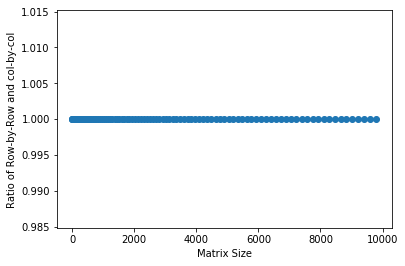

In [209]:
import matplotlib.pyplot as plt
plt.scatter(x.keys(), x.values())
plt.xlabel("Matrix Size")
plt.ylabel("Ratio of Row-by-Row and col-by-col")
plt.show()

In [136]:
#np.ones([5,5])

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

<p style="background-color:tomato;">Memory Latency</p>

<p style="background-color:yellow;">Memory latency is the time difference between the time at which the CPU is issuing a read or write command and, the time the command is complete.</p>

<p style="background-color:gray;">if the probability of getting extreme values is much higher than what a normal distribution would give long tail distribution</p>

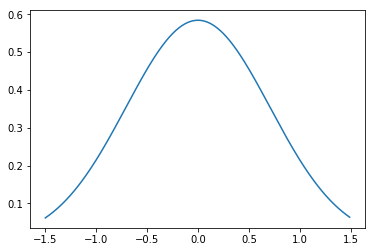

In [214]:
import numpy as np
from pylab import *

# Create some test data
dx = 0.01
X  = np.arange(-1.5, 1.5, dx)
Y  = exp(-X ** 2)

# Normalize the data to a proper PDF
Y /= (dx * Y).sum()

# Compute the CDF
CY = np.cumsum(Y * dx)

# Plot both
plot(X, Y)

show()

<p style="background-color:yellow;">RDD: Resilient distribution dataset: Approach of distributing the data</p>
<p style="color:gray;">There is a Trade-off between the size and the speed. CPU has the smallest size, yet is the fastest. Disk has the largest size yet is the slowest</p>

<p style="background-color:tomato;">Clusters</p>
<p style="color:gray;">Clusters are the computers that share memory</p>
<p style="color:gray;">Locality in the clusters means, the required data for a CPU resides in the same computer the CPU resides</p>
<p style="color:gray;">Catching turns into shuffling</p>

In [218]:
[i*i for i in range(0,10)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

<p style="background-color:tomato;">Map reduce</p>

In [222]:
L = [1,2,3,4,5]
l =map(lambda x:x*x, L) #We don't declare the order

In [224]:
sum(L)

15

<p style="background-color:tomato;">Map reduce</p>

In [227]:
reduce(lambda (x,y): x+y, L)

SyntaxError: invalid syntax (<ipython-input-227-925179570bba>, line 1)